In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


## Kaggle Dataset

In [ ]:
DATA_PATH = 'data/crop_recommendation_dataset_kaggle.csv'

with open(DATA_PATH, 'r') as file:
    df = pd.read_csv(file)

df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [17]:
df["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

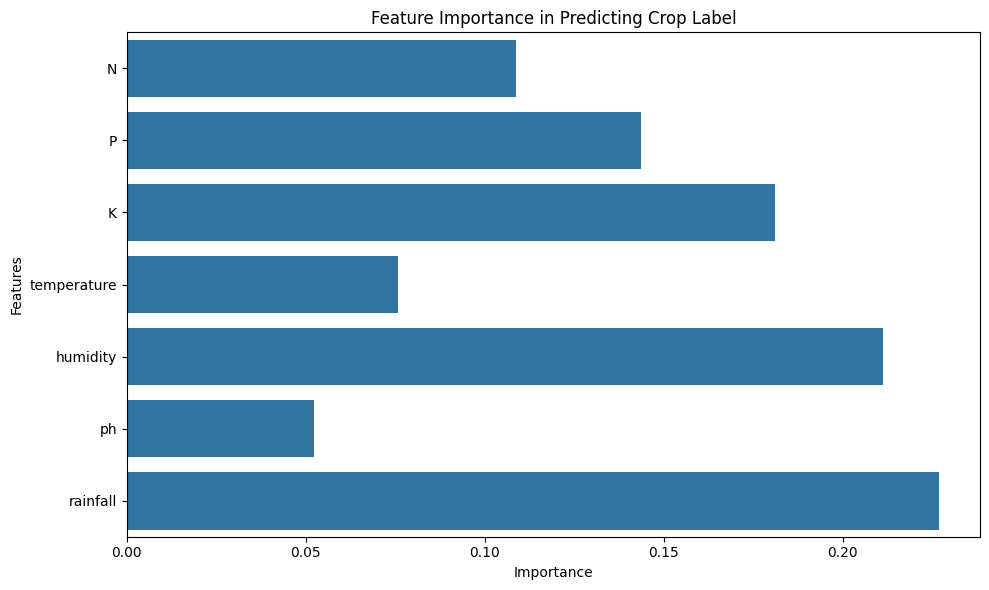

In [4]:
# Split features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Crop Label')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


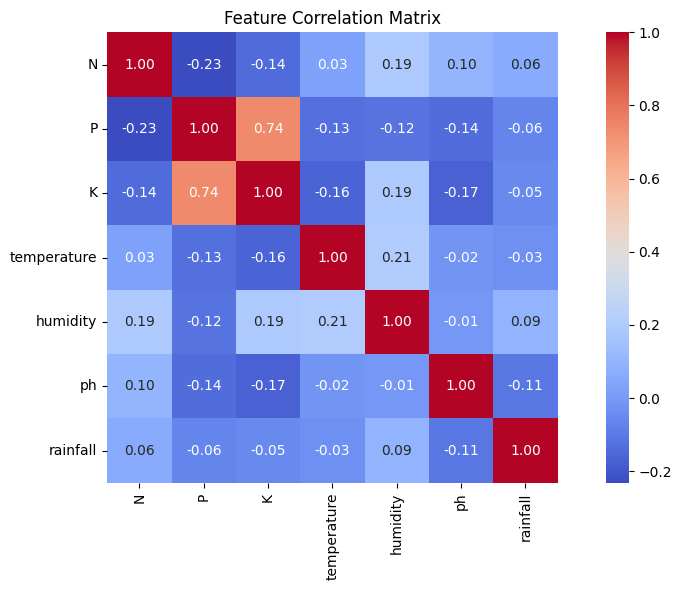

In [6]:
features_only = df.drop(columns=['label'])
corr_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

# Drop K
X_drop_k = df.drop(columns=['label', 'K'])
X = df.drop(columns='label')
y = df['label']

# Encode target
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder().fit_transform(y)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Compare accuracy with and without K
scores_full = cross_val_score(model, X, y_enc, cv=5)
scores_drop_k = cross_val_score(model, X_drop_k, y_enc, cv=5)

print("With all features:", scores_full.mean())
print("Without 'K':", scores_drop_k.mean())


With all features: 0.9945454545454545
Without 'K': 0.9909090909090909


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load and prepare data
df = pd.read_csv('data/crop_recommendation_dataset_kaggle.csv')

X = df.drop(columns='label')
y = LabelEncoder().fit_transform(df['label'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9948863636363636


In [14]:
# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Pivot table for heatmap (filtering for one split value for simplicity)
filtered = results[results["param_min_samples_split"] == 2]
heatmap_data = filtered.pivot_table(
    index='param_min_samples_leaf',
    columns='param_max_depth',
    values='mean_test_score'
)

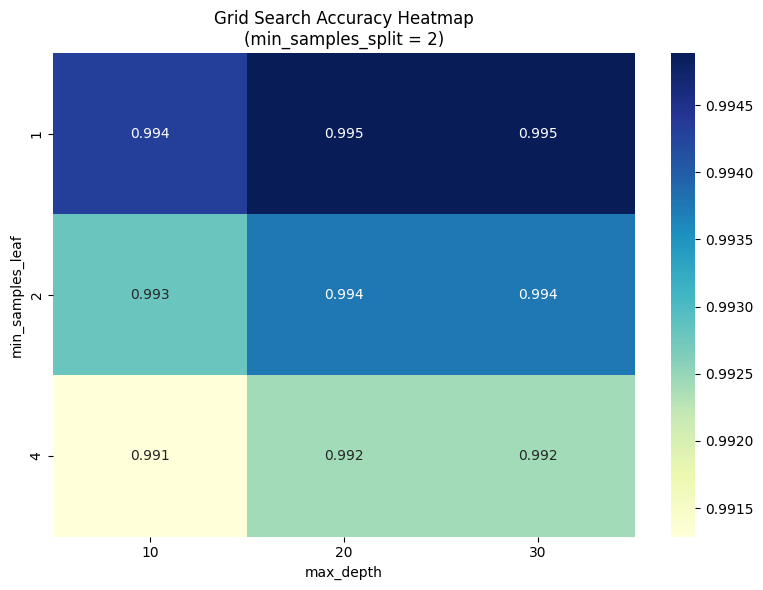

In [16]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Grid Search Accuracy Heatmap\n(min_samples_split = 2)")
plt.xlabel("max_depth")
plt.ylabel("min_samples_leaf")
plt.tight_layout()
plt.show()

## SPAM dataset

In [ ]:
import pandas as pd

df_yield = pd.read_csv("data\IFPRI_Dataverse_Data\spam2020V1r0_global_Y_TA.csv", encoding='utf-8-sig')
df_mapping = pd.read_csv("data\IFPRI_Dataverse_Data\spam_crop_mapping.csv")

crop_name_list = df_mapping["Crop name"].tolist()

# Step 1: Define columns to retain (location metadata)
retain_columns = ['grid_code', 'x', 'y', 'ADM0_NAME', 'ADM1_NAME', 'ADM2_NAME']

# Step 2: Identify crop columns from actual columns present
# Only use names that exist in the DataFrame

# Create mapping dictionary from SPAM code to full crop name
crop_mapping = {row['SPAM name'].upper(): row['Crop name'] for _, row in df_mapping.iterrows()}

# Rename function
def rename_column(col):
    return crop_mapping.get(col[:-2], col) if col.endswith('_A') else col

# Apply renaming
df_yield.columns = [rename_column(col) for col in df_yield.columns]

crop_columns = [col for col in df_yield.columns if col in crop_name_list]

# Step 3: Melt the crop columns only
df_long = df_yield.melt(
    id_vars=retain_columns,
    value_vars=crop_columns,
    var_name="crop",
    value_name="yield_kg_per_ha"
)

# Step 4: Filter only yields > 1 kg/ha
df_long_filtered = df_long[df_long["yield_kg_per_ha"] > 1].reset_index(drop=True)

# Save or use the cleaned data
# df_long_filtered.to_csv("long_crop_yield_filtered.csv", index=False)


,grid_code,x,y,ADM0_NAME,ADM1_NAME,ADM2_NAME,crop,yield_kg_per_ha
0,2019630,2.54167,51.041699,France,Hauts-de-France,Nord-Pas-de-Calais,Banana,9667.9
1,2023944,2.04167,50.958301,France,Hauts-de-France,Nord-Pas-de-Calais,Banana,5264.0
2,2023945,2.12500,50.958301,France,Hauts-de-France,Nord-Pas-de-Calais,Banana,5197.3
3,2023946,2.20833,50.958301,France,Hauts-de-France,Nord-Pas-de-Calais,Banana,9186.0
4,2023947,2.29167,50.958301,France,Hauts-de-France,Nord-Pas-de-Calais,Banana,9126.7
